# Simulación Monte Carlo para Costos y Tiempos de Transporte

### 1. Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Definir parámetros

In [2]:
distancia_km = 500
rendimiento_km_l = 3
n_simulaciones = 10_000

### 3. Generar variables (Monte Carlo)

In [3]:
np.random.seed(42)

velocidad = np.random.normal(70,10,n_simulaciones)
precio_combustible = np.random.normal(23,2,n_simulaciones)
retraso = np.random.exponential(1.5, n_simulaciones)

### 4.Tiempo total del viaje

In [4]:
tiempo_viaje = distancia_km / velocidad
tiempo_total = tiempo_viaje + retraso

### 3. Costo de transporte (combustible)

In [6]:
litros_consumidos = distancia_km / rendimiento_km_l
costo_combustible = litros_consumidos * precio_combustible

costo_total = costo_combustible

### 6. DF resultados

In [7]:
df = pd.DataFrame({
    "Velocidad_kmh": velocidad,
    "Precio_combustible": precio_combustible,
    "Retraso_h": retraso,
    "Tiempo_total_h": tiempo_total,
    "Costo_total_MXN": costo_total
})

### 7. Análisis

Costo esperado

In [12]:
df["Costo_total_MXN"].mean()
print(f"El costo esperado es de ${df['Costo_total_MXN'].mean():.2f}")

El costo esperado es de $3837.84


Probabilidad de exceder el presupuesto ($4500)

In [14]:
probabilidad_exceder = (df["Costo_total_MXN"] > 4500).mean()
print(f"La probabilidad de exceder el presupuesto es {probabilidad_exceder:.2%}")

La probabilidad de exceder el presupuesto es 2.26%


Probabilidad de retraso > 10 horas

In [17]:
probabilidad_retraso = (df["Tiempo_total_h"] > 10).mean()
print(f"La probabilidad de retraso > 10 horas es {probabilidad_retraso:.2%}")

La probabilidad de retraso > 10 horas es 20.80%


### Distribuciones

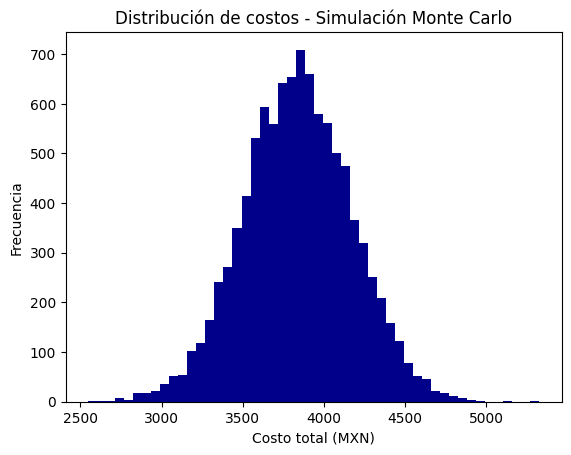

In [21]:
plt.hist(df["Costo_total_MXN"], bins=50, color="#00008B")
plt.xlabel("Costo total (MXN)")
plt.ylabel("Frecuencia")
plt.title("Distribución de costos - Simulación Monte Carlo")
plt.show()


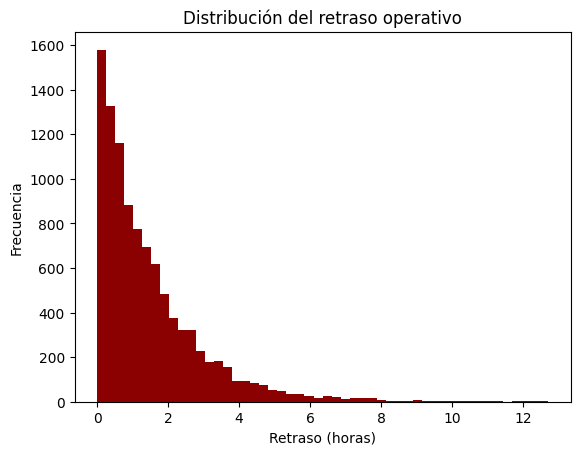

In [22]:
plt.hist(df["Retraso_h"], bins=50, color="#8B0000")
plt.xlabel("Retraso (horas)")
plt.ylabel("Frecuencia")
plt.title("Distribución del retraso operativo")
plt.show()

#### ¿Qué distribución es esta?

Distribución exponencial con un media de 1.5
Asimetrica (sesgada a la derecha), con muchos retrasos pequeños, pocos retrasos grandes pero posibles

In [25]:
percentiles_costo = np.percentile(
    df["Costo_total_MXN"],
    [50, 75, 90, 95]
)

percentiles_costo

array([3838.61557196, 4064.62162324, 4266.24736239, 4389.75125608])

In [23]:
percentiles_retraso = np.percentile(
    df["Retraso_h"],
    [50, 75, 90, 95]
)

percentiles_retraso

array([1.02973471, 2.01643059, 3.38259235, 4.39486954])

In [26]:
pd.DataFrame({
    "Percentil": ["P50", "P75", "P90", "P95"],
    "Costo_MXN": percentiles_costo,
    "Retraso_horas": percentiles_retraso
})

,Percentil,Costo_MXN,Retraso_horas
0,P50,3838.615572,1.029735
1,P75,4064.621623,2.016431
2,P90,4266.247362,3.382592
3,P95,4389.751256,4.394870


In [28]:
p = [50, 75, 90, 95]

perc_costo = np.percentile(df["Costo_total_MXN"], p)
perc_retraso = np.percentile(df["Retraso_h"], p)

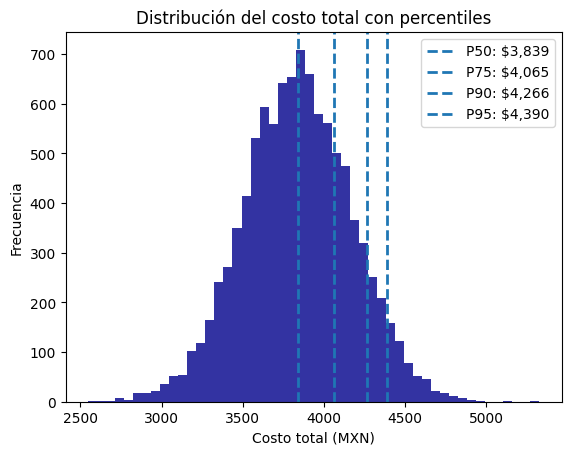

In [29]:
plt.hist(
    df["Costo_total_MXN"],
    bins=50,
    color="#00008B",
    alpha=0.8
)

for valor, percentil in zip(perc_costo, p):
    plt.axvline(
        valor,
        linestyle="--",
        linewidth=2,
        label=f"P{percentil}: ${valor:,.0f}"
    )

plt.xlabel("Costo total (MXN)")
plt.ylabel("Frecuencia")
plt.title("Distribución del costo total con percentiles")
plt.legend()
plt.show()

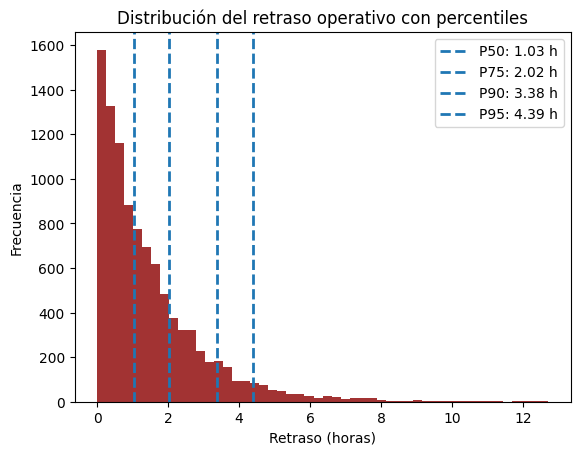

In [30]:
plt.hist(
    df["Retraso_h"],
    bins=50,
    color="#8B0000",
    alpha=0.8
)

for valor, percentil in zip(perc_retraso, p):
    plt.axvline(
        valor,
        linestyle="--",
        linewidth=2,
        label=f"P{percentil}: {valor:.2f} h"
    )

plt.xlabel("Retraso (horas)")
plt.ylabel("Frecuencia")
plt.title("Distribución del retraso operativo con percentiles")
plt.legend()
plt.show()